<a href="https://colab.research.google.com/github/cheul0518/DeepLearning/blob/main/Vision_AIHUB/%5Btorch%5DMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch Image
  - Image -> numpy: H * W * C, pixel value range: 0 to 255
  - Image -> tensor: C * H * W, pixel value range: 0 to 1
  - How to transform?
    - torchvision.transforms.ToTensor(): from 'image' or 'numpy' to 'tensor'
    - torchvision.transforms.ToPILImage(): from 'tensor' to 'image' or 'numpy'

## Load necessary modules
### Pytorch main modules
  - torch: tensor, tensor operations
  - torchvision: datasets, model architecture, transforms
  - torch.nn: neural networks and relative package
  - torch.optim: optimizer

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

## Data preparation
  - torchvision.datasets: it brings built-in data from pytorch
    - torchvision.datasets."datasetname"
    - root: path to data
    - train: if true, load the trainset. Otherwise, the testset
    - download: if true, downloads the dataset from the internet and puts it in root directory
    - transform: a function/transform that takes in an PIL image and returns a transformed version. E.g, transforms.RandomCrop.

In [2]:
train = torchvision.datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

In [3]:
test = torchvision.datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform = torchvision.transforms.ToTensor()
)

## Data structure
  - (images[], label[])

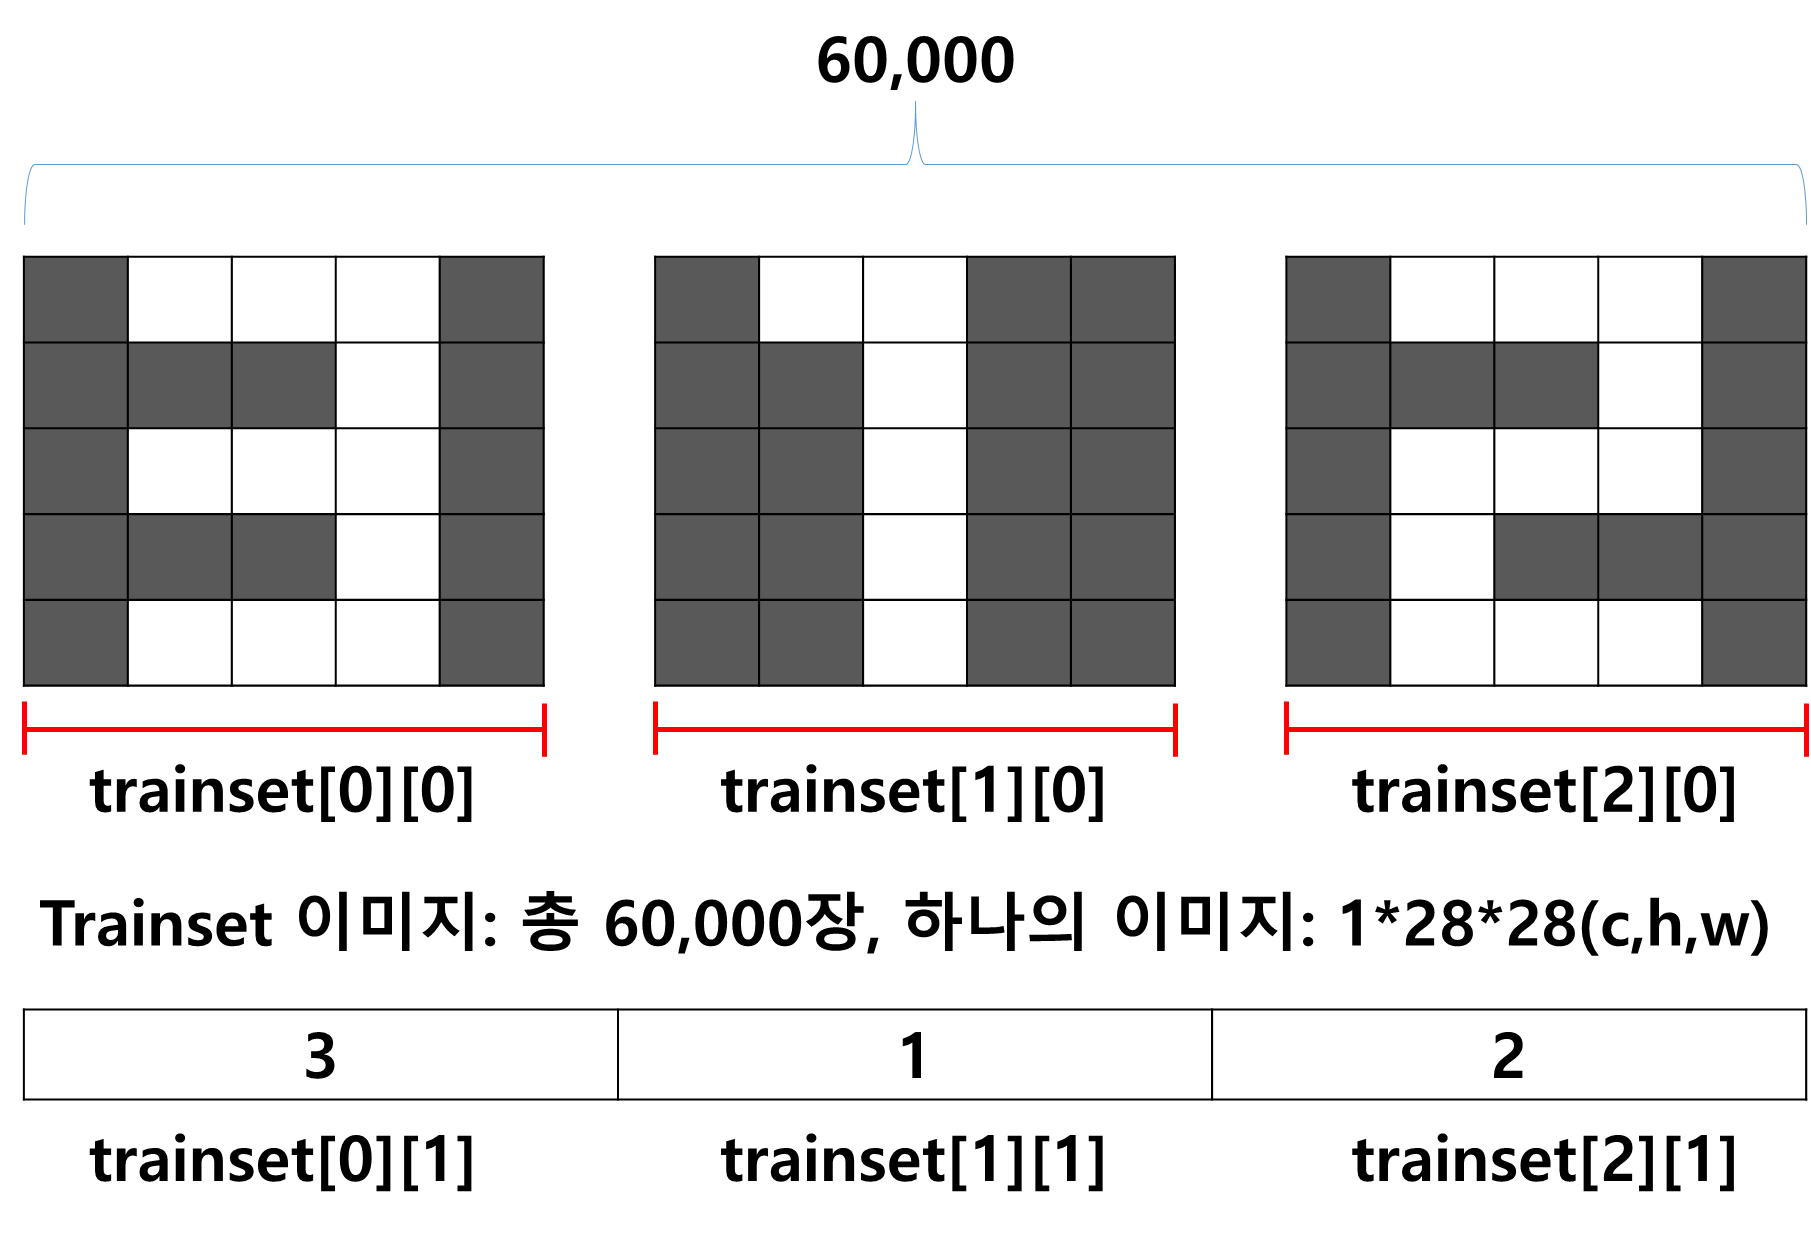

In [4]:
print(len(train), len(test))

60000 10000


In [5]:
print(len(train[0]))
print(train[0][0].size())
print(train[0][1])

2
torch.Size([1, 28, 28])
5


In [6]:
print(type(train[0][0]))

<class 'torch.Tensor'>


In [7]:
print(train[0][0])  # [0][0]: Image
print(train[0][1])  # [0][1]: Label

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

<class 'PIL.Image.Image'>


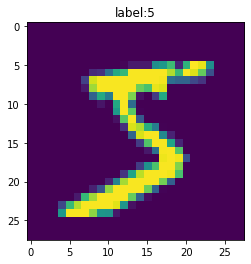

In [8]:
tf = torchvision.transforms.ToPILImage()
img, label = train[0]
img = tf(img)
print(type(img))
plt.imshow(img)
plt.title(f'label:{label}')
plt.show()

## Hyperparameter tuning
  - batch size
  - learning rate
  - epoch

In [9]:
batch_size = 100 # Split 60,000 data into 600 partitions that each has 100 data
learning_rate = 0.001
epochs = 15

### DataLoader
  - Split data in batch size

In [10]:
torch.manual_seed(25)

In [11]:
train_loader = torch.utils.data.DataLoader(
    train,
    batch_size = batch_size,
    shuffle = True,
    drop_last = True # Residual data take / drop
)

In [12]:
test_loader = torch.utils.data.DataLoader(
    test,
    batch_size = batch_size,
    shuffle = False
)

In [13]:
a = iter(train_loader)
images, labels = a.next()
images.shape, labels.shape, labels[0]

(torch.Size([100, 1, 28, 28]), torch.Size([100]), tensor(1))

In [14]:
images, labels = a.next()
images.shape, labels.shape, labels[0]

(torch.Size([100, 1, 28, 28]), torch.Size([100]), tensor(7))

### Network construction

In [15]:
model = nn.Sequential(
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Linear(512,512),
    nn.ReLU(),
    nn.Linear(512,10)
)
model.to('cuda') # set it on GPU

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=10, bias=True)
)

### Optimizer

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Loss function

In [17]:
criterion = nn.CrossEntropyLoss()

### Training

In [18]:
train_len = len(train_loader)
test_len = len(test_loader)
print(train_len, test_len, type(train_loader))

600 100 <class 'torch.utils.data.dataloader.DataLoader'>


In [19]:
for i, batch in enumerate(train_loader):
    X, Y = batch
    print(Y)

tensor([5, 7, 1, 9, 2, 7, 2, 3, 0, 0, 4, 9, 7, 1, 8, 9, 7, 0, 7, 1, 0, 1, 1, 6,
        5, 6, 1, 1, 0, 6, 5, 0, 0, 1, 5, 4, 7, 0, 3, 0, 7, 5, 0, 1, 3, 0, 8, 6,
        0, 1, 6, 9, 4, 3, 4, 2, 1, 1, 7, 0, 7, 4, 4, 7, 7, 9, 5, 8, 9, 7, 0, 0,
        2, 2, 2, 6, 7, 5, 0, 9, 2, 3, 0, 3, 8, 1, 3, 4, 8, 0, 7, 4, 9, 9, 8, 5,
        1, 8, 7, 0])
tensor([9, 8, 6, 2, 8, 1, 4, 9, 4, 9, 3, 3, 4, 9, 8, 4, 7, 3, 1, 9, 3, 6, 5, 1,
        6, 1, 2, 7, 5, 0, 5, 4, 1, 3, 0, 1, 6, 9, 1, 7, 4, 8, 4, 4, 1, 9, 6, 3,
        9, 9, 3, 0, 8, 0, 0, 6, 9, 3, 6, 2, 6, 9, 2, 0, 1, 6, 2, 5, 1, 2, 9, 0,
        3, 1, 6, 0, 0, 8, 6, 1, 8, 9, 2, 6, 9, 7, 6, 3, 0, 0, 5, 2, 8, 1, 3, 5,
        4, 4, 2, 6])
tensor([1, 2, 1, 6, 8, 5, 7, 3, 6, 5, 8, 0, 8, 1, 8, 3, 3, 7, 5, 1, 9, 4, 9, 8,
        7, 5, 1, 0, 4, 9, 5, 3, 0, 7, 0, 3, 4, 2, 7, 4, 2, 0, 8, 1, 5, 5, 9, 6,
        4, 8, 6, 6, 8, 8, 5, 0, 3, 2, 1, 5, 7, 0, 1, 5, 0, 1, 9, 0, 6, 9, 2, 3,
        3, 2, 7, 0, 3, 3, 6, 9, 6, 1, 5, 5, 3, 2, 0, 1, 4, 0, 4, 7, 3, 2, 9, 5

In [20]:
import time
losses = []
accuracies = []
t = time.time()
for epoch in range(epochs):
    print(f'Epoch {epoch} =====')
    for i, batch in enumerate(train_loader):
        accuracy = 0
        X, Y = batch
        X = X.to('cuda')
        Y = Y.to('cuda')
        X= X.view(-1, 28*28) # reshape (1,28,28) -> (1, 784)
        optimizer.zero_grad() # gradients initialization
        pred = model(X)
        loss = criterion(pred, Y) # per 100 (batch =  100)
        loss.backward()
        optimizer.step()
        accuracy = ((pred.argmax(dim=1) ==Y).sum().item()) / len(Y)
        if (i+1)%100 == 0:
            losses.append(loss.item())
            accuracies.append(accuracy)
            print(f'batch {i} loss:{loss.item()}\taccuracy: {accuracy}')
t = time.time() - t
print(f'{t} seconds')

Epoch 0 =====
batch 99 loss:2.3033721446990967	accuracy: 0.09
batch 199 loss:2.294076919555664	accuracy: 0.09
batch 299 loss:2.2932028770446777	accuracy: 0.14
batch 399 loss:2.286142110824585	accuracy: 0.13
batch 499 loss:2.285740852355957	accuracy: 0.1
batch 599 loss:2.2767274379730225	accuracy: 0.16
Epoch 1 =====
batch 99 loss:2.272974967956543	accuracy: 0.23
batch 199 loss:2.2751734256744385	accuracy: 0.15
batch 299 loss:2.266268253326416	accuracy: 0.29
batch 399 loss:2.259535789489746	accuracy: 0.33
batch 499 loss:2.263188123703003	accuracy: 0.26
batch 599 loss:2.255202531814575	accuracy: 0.3
Epoch 2 =====
batch 99 loss:2.235555648803711	accuracy: 0.48
batch 199 loss:2.243154525756836	accuracy: 0.39
batch 299 loss:2.2392592430114746	accuracy: 0.41
batch 399 loss:2.228379726409912	accuracy: 0.46
batch 499 loss:2.2143590450286865	accuracy: 0.53
batch 599 loss:2.2078094482421875	accuracy: 0.53
Epoch 3 =====
batch 99 loss:2.2066190242767334	accuracy: 0.5
batch 199 loss:2.19581651687622

In [21]:
len(losses)

90

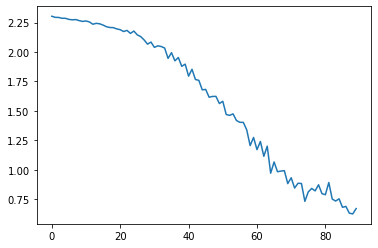

In [22]:
plt.plot(range(len(losses)), torch.Tensor(losses))

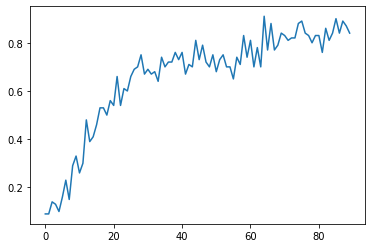

In [23]:
plt.plot(range(len(losses)), torch.Tensor(accuracies))

### Prediction

In [24]:
accuracy = 0
predictions = []
with torch.no_grad():
  for data in test_loader:
      X, Y = data
      X = X.to('cuda')
      Y = Y.to('cuda')
      X = X.view(-1, 28*28)
      output = model(X)
      preds = torch.argmax(output, dim=1)
      predictions.append(preds)
      correct = (preds == Y)
      accuracy += correct.sum().item()

In [25]:
testNum = len(test)
accuracy = accuracy / testNum
accuracy

0.8411

preds:tensor([2], device='cuda:0')
<class 'PIL.Image.Image'>


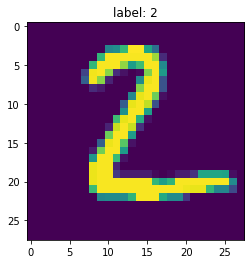

In [26]:
tf = torchvision.transforms.ToPILImage()
img, label = test[1] # (img, label)
input = img.view(-1, 28*28)
output = model(input.cuda())
preds = torch.argmax(output, 1)
print(f'preds:{preds}')

img = tf(img)
print(type(img))
plt.imshow(img)
plt.title(f'label: {label}')
plt.show()

### Try class instead of sequential

In [27]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [28]:
batch_size = 100
learning_rate = 0.001
epochs = 10

In [29]:
class Net(nn.Module):
  def __init__(self):
      super().__init__()
      self.linear1 = nn.Linear(784, 512, bias=True )
      self.linear2 = nn.Linear(512, 128, bias=True)
      self.linear3 = nn.Linear(128, 10, bias=True )
    
  def forward(self, x):
      x = F.relu(self.linear1(x))
      x = F.relu(self.linear2(x))
      x = self.linear3(x)
      return x

In [30]:
model = Net()
model.cuda()

Net(
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=10, bias=True)
)

In [31]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [32]:
def train_loop(dataloader, model, criterion, optimizer):
    accuracy = 0
    cost = 0
    for i, batch in enumerate(dataloader):
        X, Y = batch
        X = X.cuda()
        Y = Y.cuda()
        X = X.view(-1, 28*28)
        optimizer.zero_grad()
        pred = model(X)
        loss = criterion(pred, Y)
        loss.backward()
        optimizer.step()
        cost += loss
        accuracy += ((pred.argmax(dim=1)  == Y).sum().item()) / len(Y)
    return cost / len(dataloader), accuracy / len(dataloader)

In [33]:
def test_loop(dataloader, model, criterion):
    accuracy = 0
    with torch.no_grad():
      for data in dataloader:
          X, Y = data
          X = X.cuda()
          Y = Y.cuda()
          X = X.view(-1, 28*28)  
          output = model(X)
          preds = torch.argmax(output, 1) 
          correct = (preds == Y)
          accuracy += correct.sum().item()
    return accuracy / len(test)

In [34]:
losses = []
accuracies = []
for epoch in range(epochs):
    print(f'Epoch {epoch} ===========================')
    cost, accuracy = train_loop(train_loader, model, criterion, optimizer)
    print(f'loss: {cost:.4}\t\taccuracy: {accuracy:.4}')
    losses.append(cost)
    accuracies.append(accuracy)

Epoch 0 ===========================
loss: 2.294		accuracy: 0.1536
Epoch 1 ===========================
loss: 2.272		accuracy: 0.2789
Epoch 2 ===========================
loss: 2.245		accuracy: 0.397
Epoch 3 ===========================
loss: 2.209		accuracy: 0.5349
Epoch 4 ===========================
loss: 2.16		accuracy: 0.6222
Epoch 5 ===========================
loss: 2.091		accuracy: 0.6722
Epoch 6 ===========================
loss: 1.995		accuracy: 0.7012
Epoch 7 ===========================
loss: 1.866		accuracy: 0.7156
Epoch 8 ===========================
loss: 1.703		accuracy: 0.7264
Epoch 9 ===========================
loss: 1.518		accuracy: 0.7339


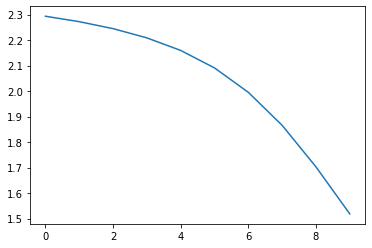

In [35]:
plt.plot(range(len(losses)), torch.Tensor(losses))

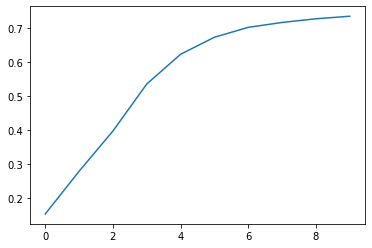

In [36]:
plt.plot(range(len(losses)), torch.Tensor(accuracies))

In [37]:
accuracy = test_loop(test_loader, model, criterion)
print(f'accuracy: {accuracy}')

accuracy: 0.7396


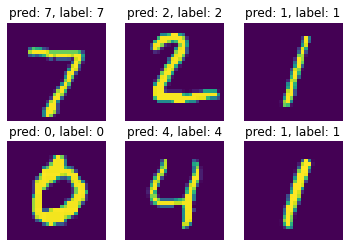

In [39]:
tf = torchvision.transforms.ToPILImage()
for i in range(6):
    # prediction
    img, label = test[i] # (img, label)
    input = img.view(-1, 28*28)
    output = model(input.cuda())
    preds = torch.argmax(output, 1)
    # imagme out
    img = tf(img)
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.imshow(img)
    plt.title(f'pred: {preds.item()}, label: {label}')
plt.show()